In [1]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#  1-Collecte de données

In [2]:
# read the dataset using pandas
df = pd.read_csv('Car details v3.csv')

In [3]:
df.shape

(8128, 13)

In [4]:
# preview the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# 2-Traitement de la donnée

## Eliminer les valeurs en double

In [7]:
#df = df.drop_duplicates()  #on a supprimer les donnees dupliquees

In [8]:
df.shape

(8128, 13)

## Eliminer les outlier:
### A travers la fonction remove_outlier

In [9]:
def remove_outlier(df_in, col_name):   #une fonction qui retourne une dataframe avec les outlier supprimes pour visualiser l'accurancy 
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [10]:
#df = remove_outlier(df,'year')
#df = remove_outlier(df,'selling_price')
#df = remove_outlier(df,'km_driven')

## Vérifiez s’il manque des valeurs

In [11]:
df.isnull().values.any()

True

In [12]:
df = df.dropna() #supprimer les colones qui ont des valeurs null

In [13]:
df.shape

(7906, 13)

## Extraire la variable cible

In [14]:
Correct_Mileage= [] #une fonction pour convertir le km/kg on kmpl et supprimer l'utite + rendre la donnee float
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))

In [15]:
df['mileage']=Correct_Mileage
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.00,1248 CC,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.10,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.00,1497 CC,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.00,1298 CC,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.10,1197 CC,81.86,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,24.22,1061 CC,57.5,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.00,796 CC,37,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.50,1364 CC,67.1,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399 CC,68.1,160Nm@ 2000rpm,5.0


In [16]:
df[['engine', 'unit']] = df["engine"].apply(lambda x: pd.Series(str(x).split(" "))) #on split la colonne engine on valeur et unite 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74,190Nm@ 2000rpm,5.0,CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250Nm@ 1500-2500rpm,5.0,CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,CC


In [17]:
df = df.drop(['unit'], axis=1) #on supprime la colonne unite 
df['engine']= pd.to_numeric(df['engine'],errors = 'coerce') # convertir la colonne engine from string to numeric

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 864.7+ KB


In [44]:
df['max_power']= pd.to_numeric(df['max_power'],errors = 'coerce') # convertir la colonne max_power from string to numeric
print(df.corr()) # calculer la correlation pour visualiser les features qu'on test

                   year  selling_price  km_driven      fuel  seller_type  \
year           1.000000       0.412302  -0.428548 -0.032935     0.231798   
selling_price  0.412302       1.000000  -0.222158 -0.201221     0.321389   
km_driven     -0.428548      -0.222158   1.000000 -0.246821    -0.192788   
fuel          -0.032935      -0.201221  -0.246821  1.000000     0.036044   
seller_type    0.231798       0.321389  -0.192788  0.036044     1.000000   
transmission   0.249002       0.590269  -0.201186  0.010803     0.357740   
owner         -0.499703      -0.216514   0.281182 -0.014162    -0.197571   
mileage        0.322996      -0.122398  -0.166996  0.061931    -0.025958   
engine         0.018263       0.455682   0.206031 -0.487862     0.120017   
max_power      0.226598       0.749674  -0.038159 -0.306224     0.239235   
seats         -0.007923       0.041617   0.227259 -0.338849    -0.075284   
maison         0.100660       0.465900  -0.017494 -0.295238     0.081059   
modeles     

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [23]:
df = df.drop(['torque'], axis=1) # on supprime la colonne torque

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.20,5.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 803.0+ KB


In [26]:
df['name'].value_counts()

Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1982, dtype: int64

In [27]:
maisons = [] #on divise la colonne name en 2 : maison et modeles 
modeles = []
for idx, name in zip(range(len(df['name'])) ,df['name']):
    maisons.append(name.split(" ")[0])
    modeles.append(name.split(" ")[1])
df['maison'] = maisons
df['modeles'] = modeles

In [28]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison,modeles
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74.00,5.0,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,5.0,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78.00,5.0,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90.00,5.0,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.20,5.0,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197,82.85,5.0,Hyundai,i20
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493,110.00,5.0,Hyundai,Verna
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.0,1248,73.90,5.0,Maruti,Swift
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.5,1396,70.00,5.0,Tata,Indigo


In [29]:
df = df.drop(['name'], axis=1)# supprimer la colonne name

In [30]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison,modeles
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248,74.00,5.0,Maruti,Swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,5.0,Skoda,Rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497,78.00,5.0,Honda,City
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90.00,5.0,Hyundai,i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298,88.20,5.0,Maruti,Swift


In [31]:
encoder = ce.OrdinalEncoder(cols=['maison', 'modeles','seller_type', 'transmission', 'owner' , 'fuel'])
df = encoder.fit_transform(df) #encoder les donnees string 


In [32]:
df.sample(frac=1) #augmenter la variation de la dataset 

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison,modeles
4236,2017,3200000,45000,1,2,2,1,19.3,1999,177.00,5.0,20,58
3734,2019,550000,15000,2,1,2,1,18.0,1197,81.86,5.0,4,78
4483,2017,575000,96000,1,1,1,1,19.8,1461,83.80,5.0,7,10
4893,2019,500000,10000,2,1,1,1,20.8,1197,81.80,5.0,1,90
3289,2017,493000,40000,2,1,1,1,20.0,1199,84.00,5.0,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,2013,600000,110000,1,1,1,2,12.0,2179,120.00,8.0,8,46
2478,2012,750000,120000,1,1,1,1,12.0,2494,102.00,8.0,5,28
2059,2013,260000,189000,1,1,1,1,21.0,1248,88.76,5.0,9,37
7066,2016,350000,9900,2,1,1,1,23.9,998,67.05,5.0,1,14


# 3-Modelling

In [33]:
#Devision de la dataframe en :donnees test et donnees prediction
X = df.drop(['selling_price' , 'km_driven' ,'fuel','seller_type','owner' ,'mileage','seats','maison','modeles','transmission'], axis=1) #donnees test 

y = df['selling_price'] #la donnees à predire
X.head()

,year,engine,max_power
0,2014,1248,74.00
1,2014,1498,103.52
2,2006,1497,78.00
3,2010,1396,90.00
4,2007,1298,88.20


In [34]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
#chose a scaling
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
#transform training
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#calling fit and transform
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)

## Linear Regression

In [36]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
#Actual Value 
print(y_test)
#Prediced Value
print(y_pred)


3756    501000
5692    440000
3637    140000
7693    476999
3565    620000
         ...  
3730    220000
3017    175000
4751    525000
7056    650000
6723    650000
Name: selling_price, Length: 2372, dtype: int64
[ 381099.33448356  432126.54735157  193287.95838307 ...  707393.50002512
 1112090.06692661 1134562.44485779]


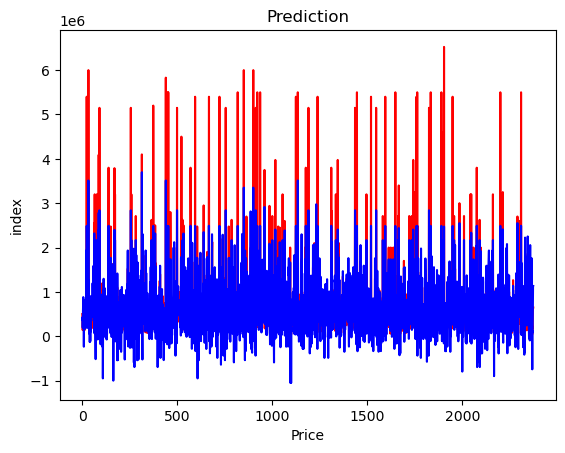

In [37]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Price')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [38]:
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
mse = mean_squared_error(y_test,y_pred)

In [40]:
rsq = r2_score(y_test,y_pred)

In [41]:
print('mean squared error :',mse)
print('r square :',rsq) 

mean squared error : 247933143894.38586
r square : 0.6306242109044575


## Random Forest Regression

In [42]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib

rfr = RandomForestRegressor(max_depth=13, random_state=0) #Training set

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

joblib.dump(rfr,'Car details v3.1.pkl') #sauvegarder le modele de training
print(y_pred)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("R squared: ", metrics.r2_score(y_test, y_pred))

#load model and test with an array
#rfr = joblib.load('Car details v3.1.pkl')
#Z_test = [[2002 ,5 ,15.50]]
#y_pred = rfr.predict(Z_test)
#print(y_pred)


[464626.50089022 528028.61524088 200862.52096953 ... 444055.70668688
 841122.33078154 629017.16516934]
MSE:  16140617650.242537
R squared:  0.9759533828862048


## Decision Tree Regression

In [43]:
# Fitting Decision Tree Regression to the Training set
from sklearn.model_selection import train_test_split


X1 = df.iloc[:, :-1].values
Y1 = df.iloc[:, -1].values.reshape(-1,1)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=41)


regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=13)
regressor.fit(X1_train,Y1_train)

Y1_pred = regressor.predict(X1_test) 

np.sqrt(mean_squared_error(Y1_test, Y1_pred))
metrics.r2_score(Y1_test, Y1_pred)

0.888660668464408

### Analyse:
On remarque que l'algorithme de Random Forest ganrantie un resultat encouragant qui est de 0.97, 
ce qui est pas le cas l'algorithme de Decision Tree Regression et  Linear Regression.